In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

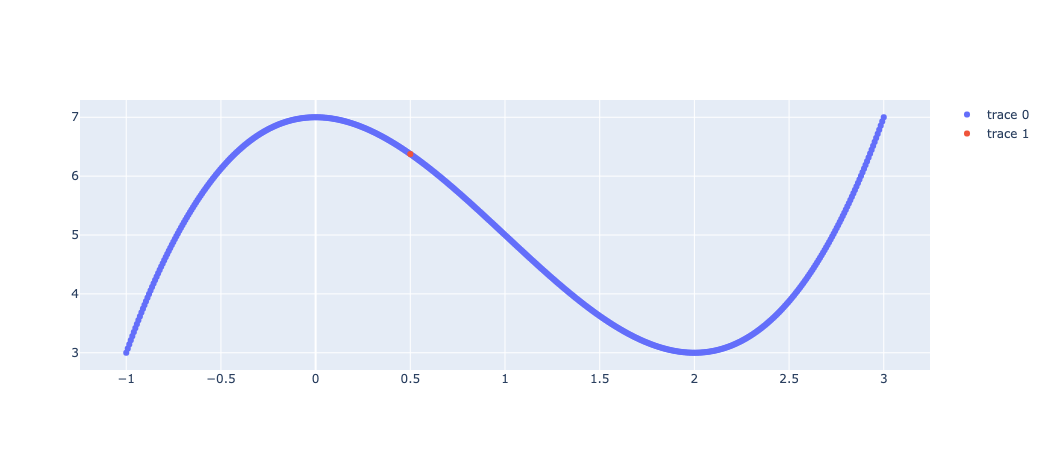

In [11]:
f_x = lambda x:(x ** 3)-(3 *(x ** 2))+7
deriv_x = lambda x:3*x**2 - 6*x
start_p = np.array([0.5])
array_x = np.linspace(-1,3,500)
# fig = go.Figure()
# fig = px.scatter(x=array_x,y=array_x)
# #fig = px.scatter(x=start_p,y=f_x(start_p))
# fig.show()
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=array_x, y=f_x(array_x),mode='markers'))
fig.add_trace(go.Scatter(x=start_p, y=f_x(start_p),mode='markers'))
fig.show()

[0.1125]


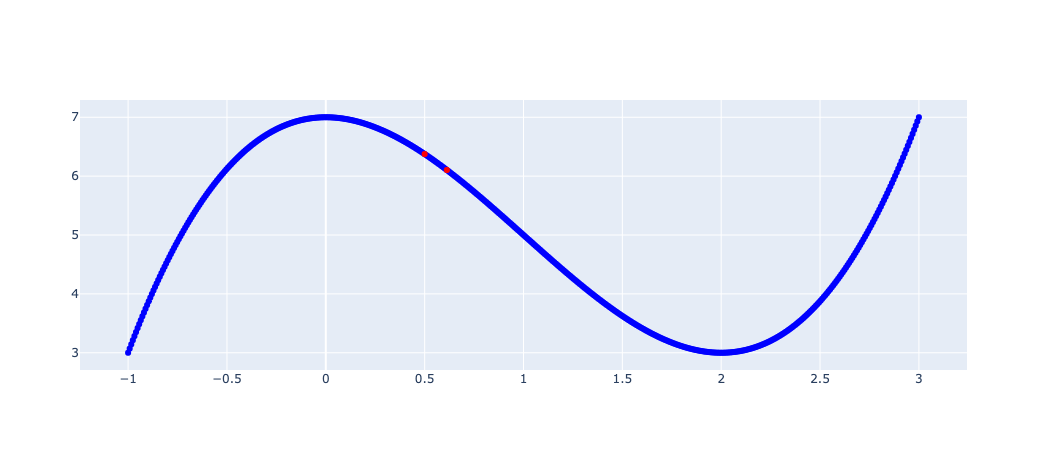

1


In [12]:
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=array_x, y=f_x(array_x),mode='markers',marker_color='blue'))
fig.add_trace(go.Scatter(x=start_p, y=f_x(start_p),mode='markers',marker_color='red'))

deriv_x = lambda x:3*x**2 - 6*x
criteria = 0.001
learning_rate = 0.05
flag = True
i = 0
while flag:
    new_p = start_p - learning_rate*deriv_x(start_p)
    if abs(new_p - start_p) < criteria:
        flag = False
        print(abs(new_p - start_p))
    fig.add_trace(go.Scatter(x=new_p, y=f_x(new_p),mode='markers',marker_color='red'))
    start_p = new_p
    i = i + 1
    
fig.update_layout(showlegend=False) 
fig.show()
print(i)

In [14]:
import ipywidgets
ipywidgets.IntSlider()


IntSlider(value=0)

In [5]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

In [6]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)

In [7]:
df.sample(3)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
206809,2013,5,15,1204.0,-6.0,1515.0,-14.0,UA,N518UA,257,JFK,SFO,336.0,2586,12.0,4.0
132259,2013,2,24,1848.0,-7.0,2144.0,-11.0,UA,N497UA,470,EWR,PBI,143.0,1023,18.0,48.0
247071,2013,6,27,1039.0,-1.0,1144.0,-15.0,B6,N337JB,2602,JFK,BUF,50.0,301,10.0,39.0


In [8]:
month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month])

textbox = widgets.Dropdown(
    description='Airline:   ',
    value='DL',
    options=df['carrier'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(df['origin'].unique()),
    value='LGA',
    description='Origin Airport:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='NYC FlightDatabase'
                        ),
                        barmode='overlay'
                    ))

In [9]:
def validate():
    if origin.value in df['origin'].unique() and textbox.value in df['carrier'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['carrier'] == textbox.value,
                               df['origin'] == origin.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['carrier'] == 'DL', df['origin'] == origin.value)]
            temp_df = df[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'


origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")